# Monitoring

`emceeX` has some basic functionality to monitor running samplers. For this we load the dump file from the command line example.

In [1]:
from emceex import EnsembleSampler
from IPython.display import display
from IPython.display import Math
import numpy as np
import warnings

In [2]:
mcmc = EnsembleSampler.load_dump("sampler.dump")

## Autocorrelation time

The autocorrelation time can be evaluated with the following method. If `display_plot` is `True` the evolution of the autocorrelation time is evaluated at `N` points. The convergence limit is evaluated using the $\beta$ parameters.


    mu1:  ███████████████████████████████████████████████████████████████████ 37
    sig1: ███████████████████████████████████████████████▊                    27
    mu2:  ████████████████████████████████████████████████████████▊           32
    sig2: █████████████████████████████████████████████████████▏              30

    mean: ████████████████████████████████████████████████████████            31



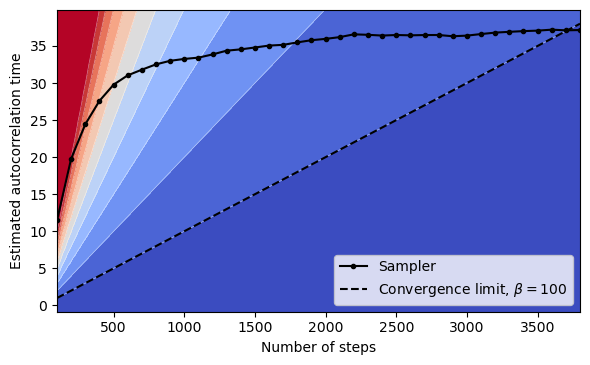

In [3]:
tau = mcmc.monitor.evaluate_autocorrelation(display_meters=True, display_plot=True)

## Progress estimation

The progress estimation shows the current normalized values of $\beta$ and $\delta$, which need to be $<1$ for convergences. Furthermore, the current number of iterations is compared to and estimated number of iterations that is needed for convergence.

In [4]:
mcmc.monitor.estimate_progress()


Iterations: 3800

beta:       ████▉                                                           0.98
delta:      ▌                                                           1.05e-01

Progress:   ███████████████████████████████████████████████████████████     3800



## Plotting model

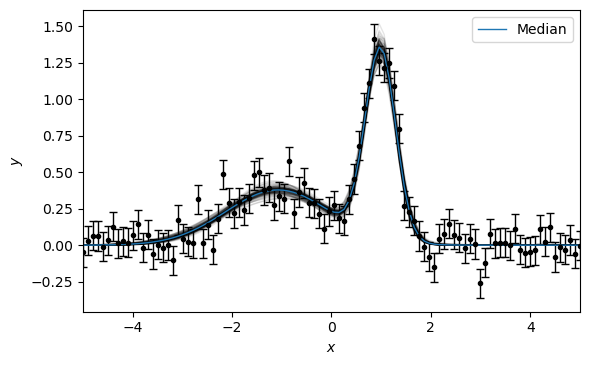

In [5]:
fig, ax, samples = mcmc.monitor.plot_data(nsamples=100, theta=[mcmc.monitor.get_theta(which="median")], theta_labels=["Median"])
ax.set_xlim(mcmc.x.min(), mcmc.x.max())
fig.tight_layout()

## Plotting parameters

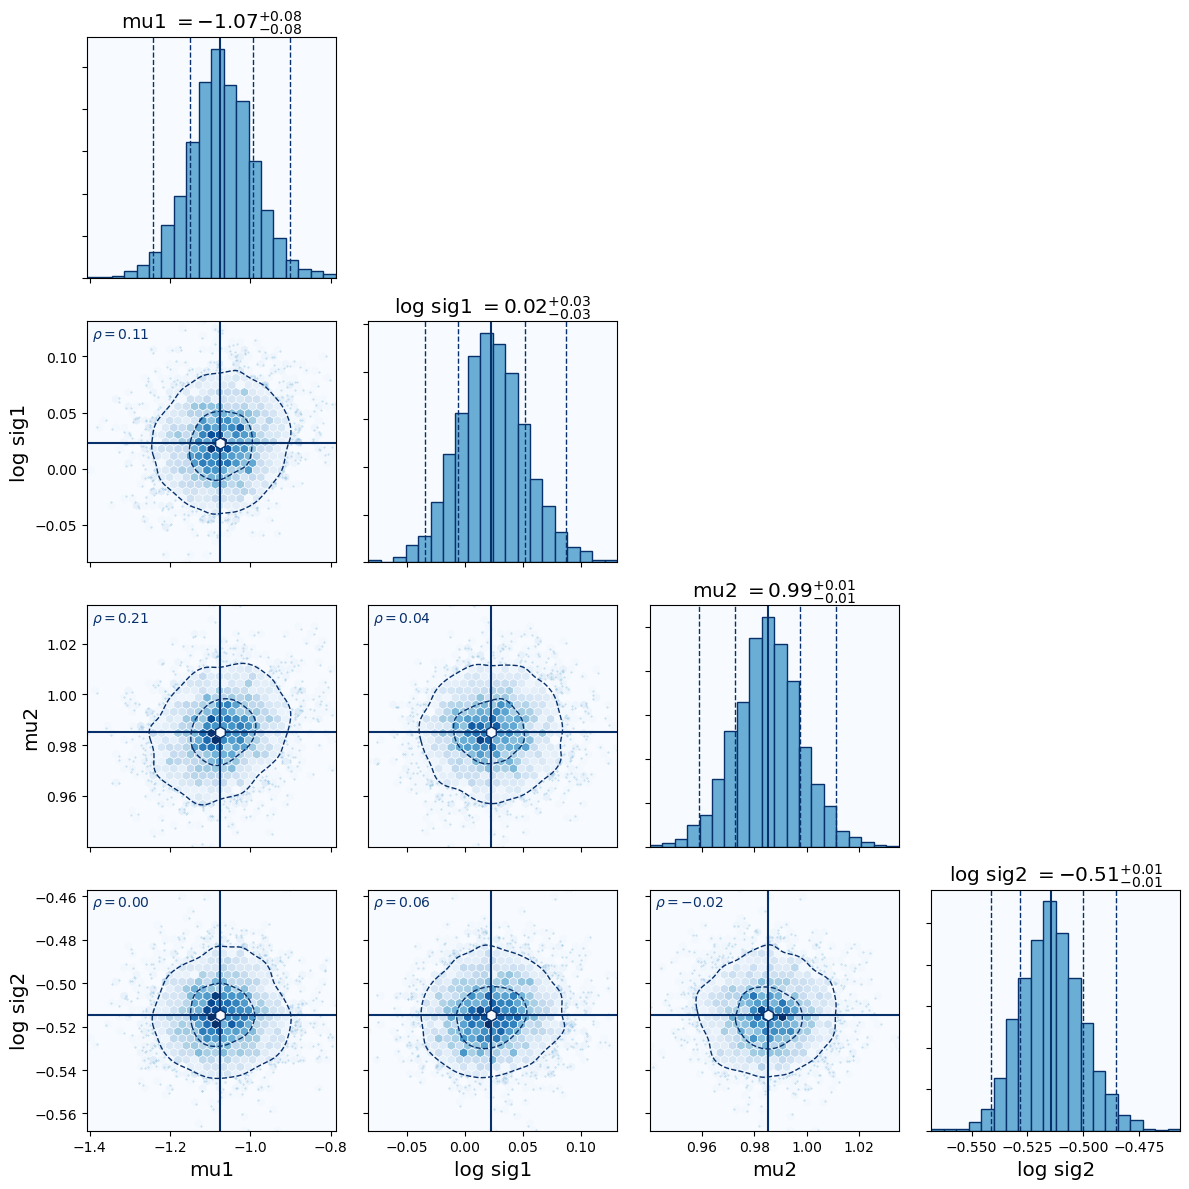

In [6]:
mcmc.monitor.plot_pairs(
    sigma_levels=[1., 2.],
    scatter_outside_sigma=2.,
    title_quantiles=[16., 50., 84.],
    show_correlations=True,
);

## Parameter estimates

In [7]:
flat_samples = mcmc.monitor.get_flat_samples()
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    flat_samples = np.where(mcmc.log[None, :], np.log10(flat_samples), flat_samples)
p = np.quantile(flat_samples, [0.16, 0.50, 0.84], axis=0)
for i in range(mcmc.ndim):
    qq = np.diff(p[:, i])
    msg = "\mathrm{{{label}}} = {:.3f}_{{-{:.3f}}}^{{{:.3f}}}"
    if mcmc.log[i]:
        msg = "\log " + msg
    msg = msg.format(p[1, i], qq[0], qq[1], label=mcmc.labels[i])
    display(Math(msg))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>